In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

In [16]:
cluster_count = 3


In [19]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                  random_state=1)
X.shape, y.shape

((100, 2), (100,))

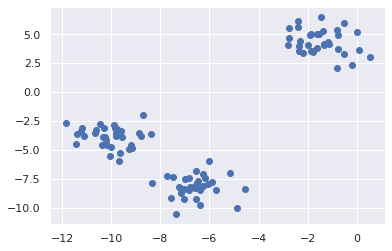

In [20]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [22]:
np.random.seed(1234)
centroids = X[np.random.randint(0, X.shape[0], size=3)]
centroids

array([[  0.5260155 ,   3.00999353],
       [ -5.16022348,  -7.04217141],
       [-10.17863281,  -4.55726918]])

In [48]:
labels = cdist(X, centroids)
labels[:5]

array([[ 1.60060758, 10.13570072, 11.50885115],
       [12.44397113,  4.57170773,  1.05840646],
       [14.10664358,  6.79245429,  1.26710263],
       [12.01729549,  6.00474853,  1.42643018],
       [12.48439433,  1.49590155,  6.8274392 ]])

In [44]:
# cdist(X[0], centroids[0])
X[0], centroids[0]

(array([-0.79415228,  2.10495117]), array([0.5260155 , 3.00999353]))

In [45]:
np.sum((X[0] - centroids[0])**2)**0.5

1.600607583355101

In [49]:
labels = np.argmin(labels, axis = 1)
labels[:5]

array([0, 2, 2, 2, 1])

In [56]:
np.mean(X[labels == 0], axis=1)

array([0.65539945, 1.39551725, 1.5799382 , 1.84611314, 0.60727581,
       1.40829934, 1.34742522, 1.0744486 , 1.50469868, 0.62753452,
       0.83373272, 1.0202292 , 2.07550751, 1.76800452, 0.93201766,
       0.84413515, 1.74214601, 1.68597946, 1.48088347, 1.62270009,
       0.84832167, 2.25850773, 2.57438815, 0.57289479, 2.69918808,
       0.82925784, 1.39040407, 2.51905029, 1.48202903, 1.03150962,
       1.08037104, 1.56232946, 1.95882923, 1.86526741])

In [57]:
np.argmin(np.mean(X[labels == 0], axis=1))

23

### **Algorithm** :
1. Randomly initialize k centroids. Note that each centroid is a vector in $m$ dimensional space.

2. Repeat until convergence:
   
      a. Assign points to the closest centroids.

      b. Calculate the centroids based on the points assigned to the cluster.

The algorithm converges when the centroid stops changing or in other words the cluster memebership stabilizes and subsequent iterations do not yield any changes.

In [58]:
def fit(X, k):
    # initialt random points as centroid
    centroids = X[np.random.randint(0, X.shape[0], size=k)]

    # calculate initial labels
    labels = np.argmin(cdist(X, centroids), axis = 1)

    for _ in range(10):
        prev_label = labels.copy()

        # comput new centroids
        centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])

        # compute new labels
        labels = np.argmin(cdist(X, centroids), axis=1)

        # check if labels changes if not changes then all points are clustered properly
        if all(labels == prev_label):
            break
    return centroids, labels

In [60]:
centroids, labels = fit(X, cluster_count)

In [61]:
print(f'Centroids:\n{centroids}')

Centroids:
[[ -6.58196786  -8.17239339]
 [ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]]


Visualize

In [62]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):

    # plot input data
    ax = ax or plt.gca() 
    ax.axis('equal') 

    # plot data points
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='plasma', zorder=2)

    # plot the representation of the KMeans model.
    radii = [cdist(X[labels==i],[center]).max() for i, center in enumerate(centroids)] 

    for c,r in zip(centroids, radii):
    # add circular shapes to the clusters
        ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw =5, alpha=0.5,zorder=1)) 

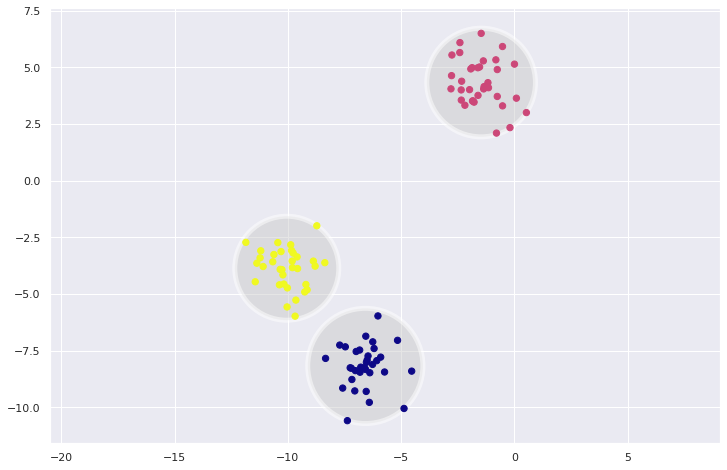

In [63]:
plt.figure(figsize=(12,8)) 
plot_kmeans(X ,centroids, labels)